In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

In [46]:
# Create a Spark session
spark = SparkSession.builder.appName("DataCleaning").getOrCreate()

In [47]:
# Load your dataset
train_user_df = spark.read.csv('../data/cleaned_data_train-users.csv', header=True, inferSchema=True)
train_user = train_user_df.toPandas()

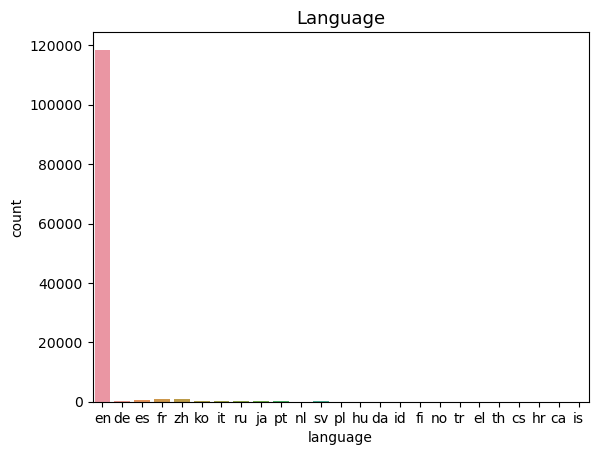

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='language', data=train_user)
plt.title("Language", size=13);

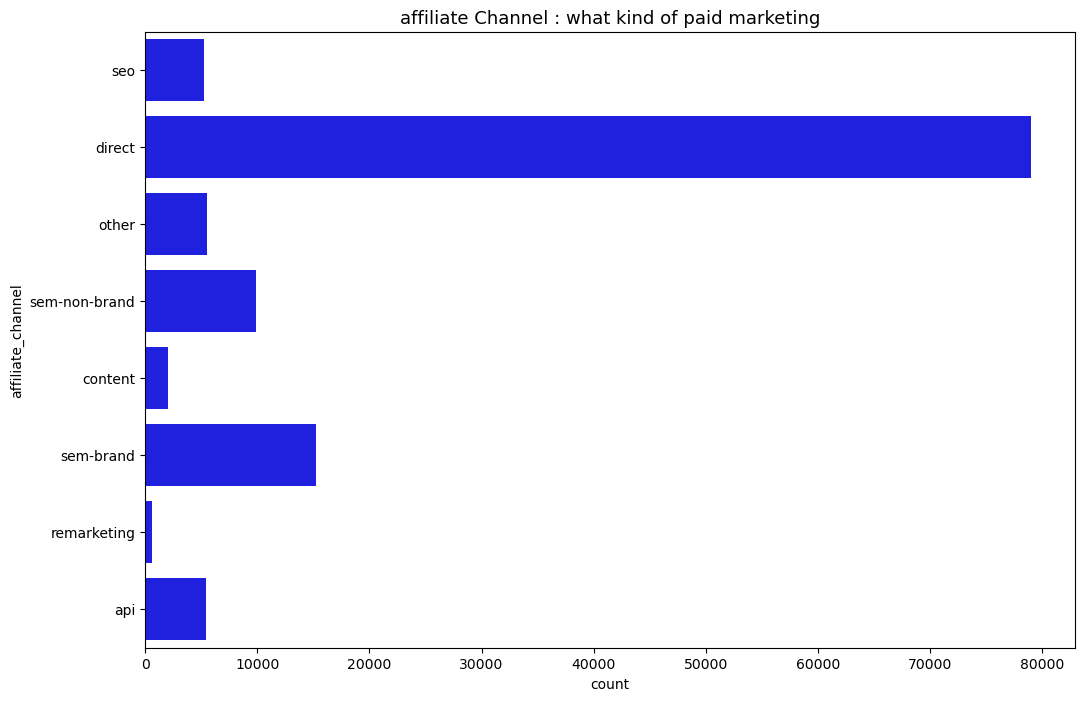

In [49]:
plt.subplots(figsize=(12,8 )) #is used to adjust the size of the plot before creating any visualizations. It specifies the dimensions of the plot in inches (width, height). 
sns.countplot(y='affiliate_channel', data=train_user ,color = 'blue')
plt.title("affiliate Channel : what kind of paid marketing", size=13);

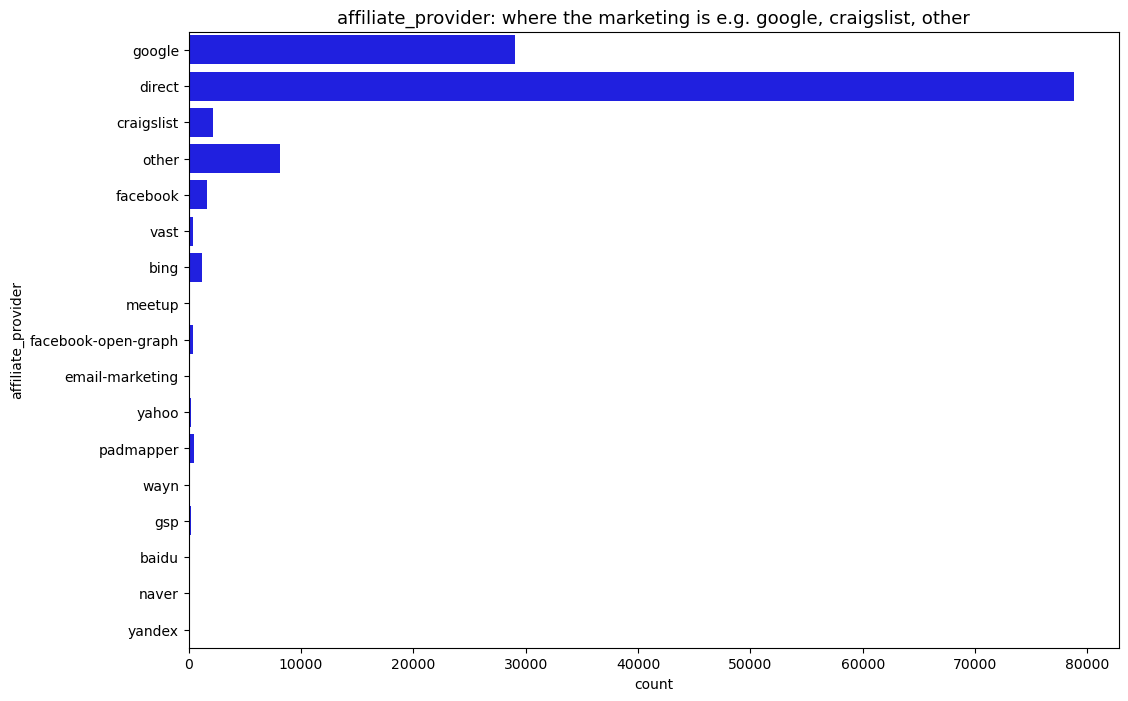

In [50]:
plt.subplots(figsize=(12,8 )) #is used to adjust the size of the plot before creating any visualizations. It specifies the dimensions of the plot in inches (width, height). 
sns.countplot(y='affiliate_provider', data=train_user ,color = 'blue')
plt.title("affiliate_provider: where the marketing is e.g. google, craigslist, other", size=13);

Text(0.5, 1.0, "first_affiliate_tracked: what's the first marketing the user interacted with before signing up")

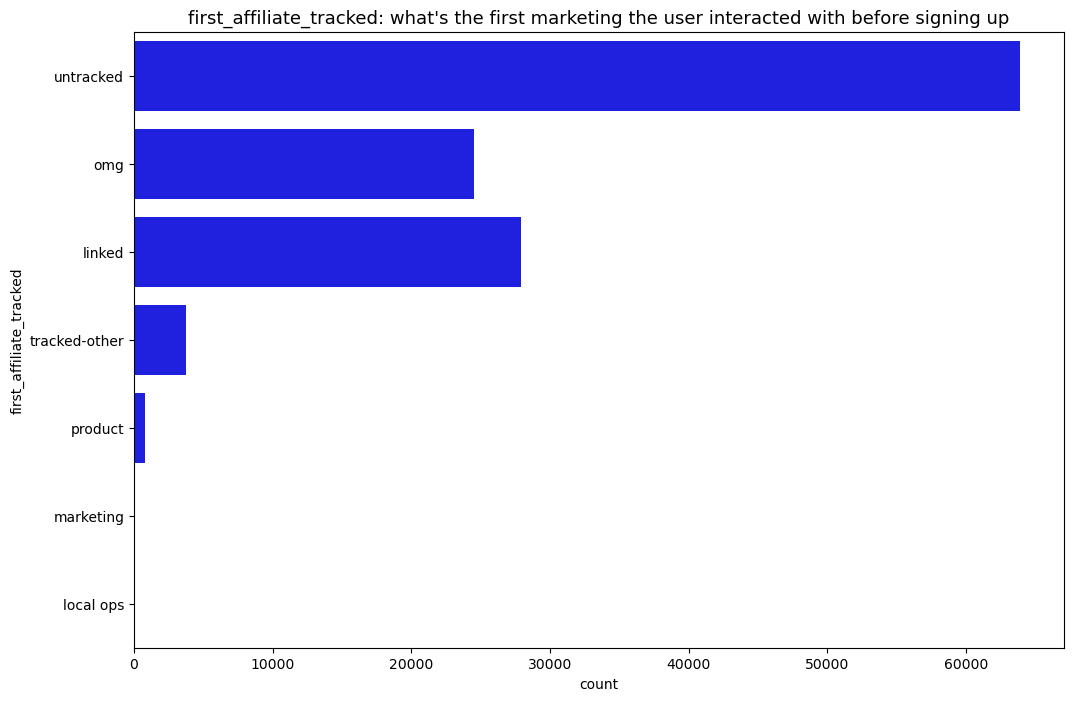

In [51]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='first_affiliate_tracked', data=train_user, color='blue')
plt.title("first_affiliate_tracked: what's the first marketing the user interacted with before signing up", size=13)

In [52]:
train_user = train_user_df.toPandas()

# Test if values in the 'first_affiliate_tracked' column are null
null_count = train_user["first_affiliate_tracked"].isnull().sum()

print("Number of null values in 'first_affiliate_tracked':", null_count)

Number of null values in 'first_affiliate_tracked': 1960


In [53]:
# Calculate the mode of the column
mode_value = train_user_df.groupBy("first_affiliate_tracked").count().orderBy(col("count").desc()).first()["first_affiliate_tracked"]

# Impute missing values with the mode
train_user = train_user.fillna({"first_affiliate_tracked": mode_value})

# Save the cleaned dataset to a new CSV file
# train_user.to_csv("data/train_user.csv", index=False)

In [54]:
# Test if values in the 'first_affiliate_tracked' column are null
null_count = train_user["first_affiliate_tracked"].isnull().sum()

print("Number of null values in 'first_affiliate_tracked':", null_count)

Number of null values in 'first_affiliate_tracked': 0


Text(0.5, 1.0, "first_affiliate_tracked: what's the first marketing the user interacted with before signing up")

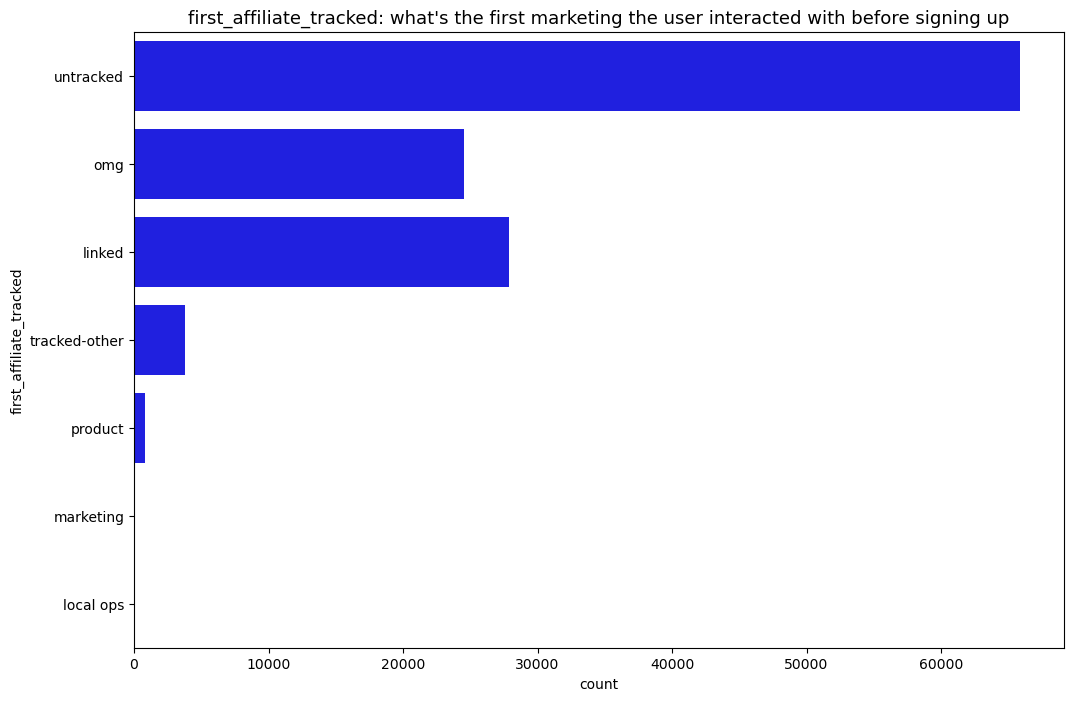

In [55]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='first_affiliate_tracked', data=train_user, color='blue')
plt.title("first_affiliate_tracked: what's the first marketing the user interacted with before signing up", size=13)

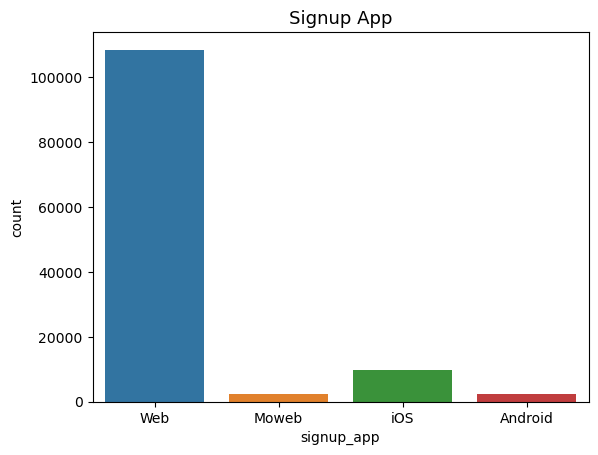

In [56]:
sns.countplot(x='signup_app', data=train_user)
plt.title("Signup App", size=13);

Text(0.5, 1.0, 'First Device Type')

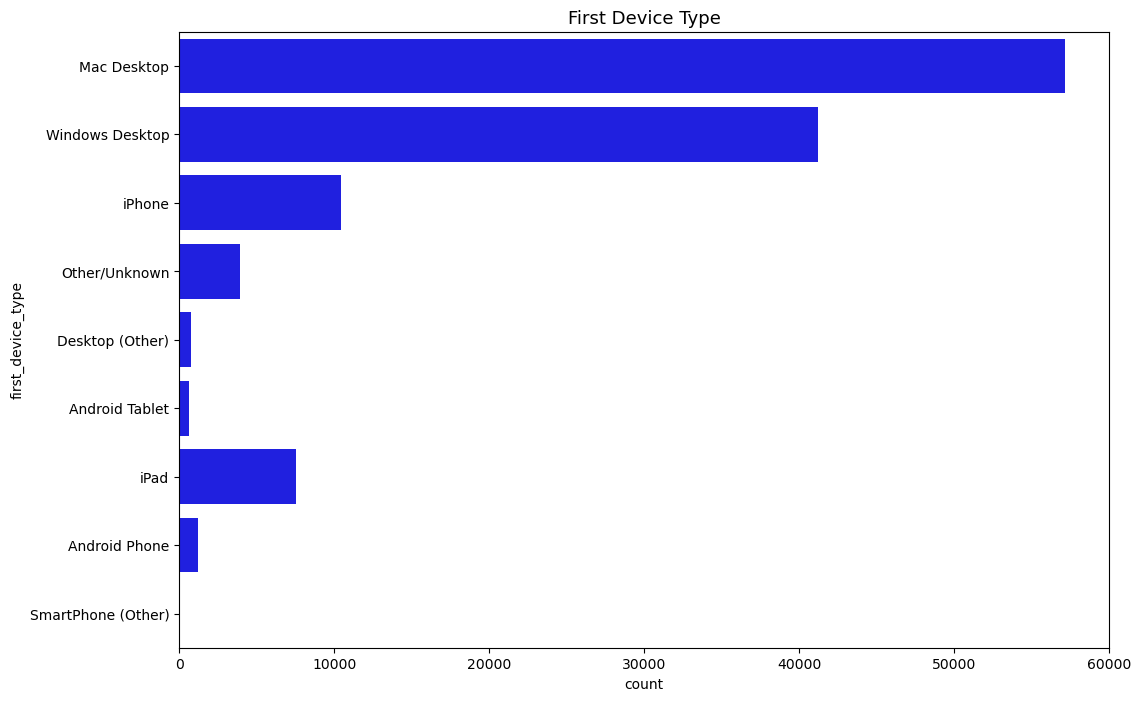

In [57]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='first_device_type', data=train_user, color='blue')
plt.title("First Device Type", size=13)

Text(0.5, 1.0, 'First Browser')

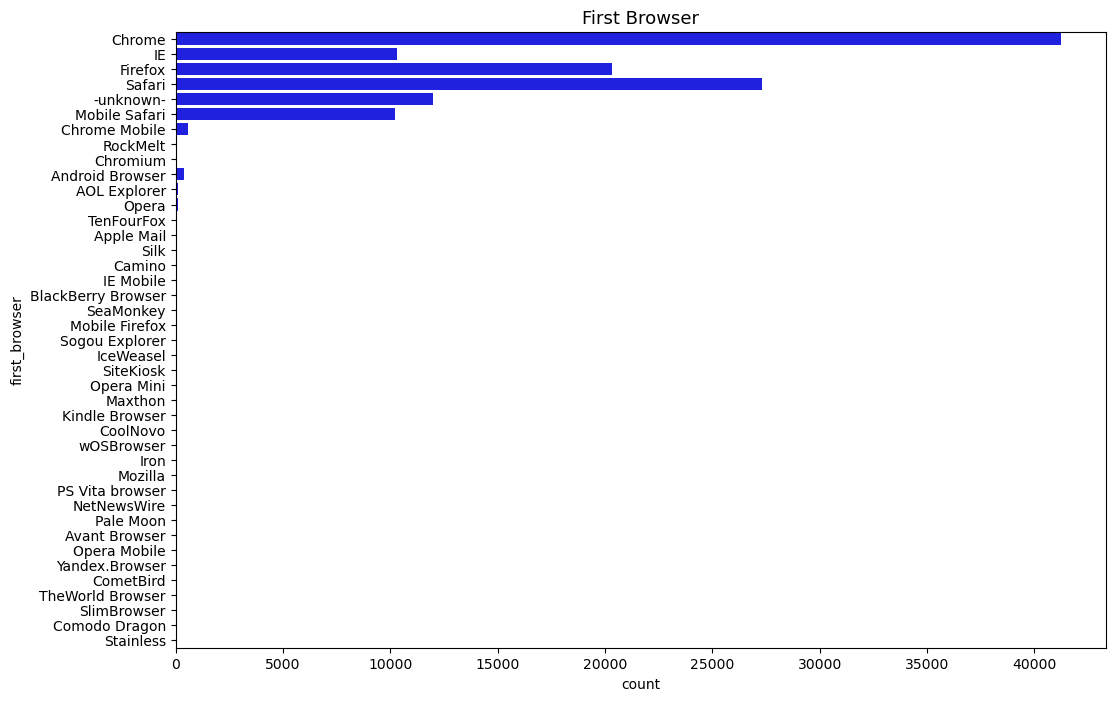

In [58]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='first_browser', data=train_user, color='blue')
plt.title("First Browser", size=13)

Text(0.5, 1.0, 'Country Destination')

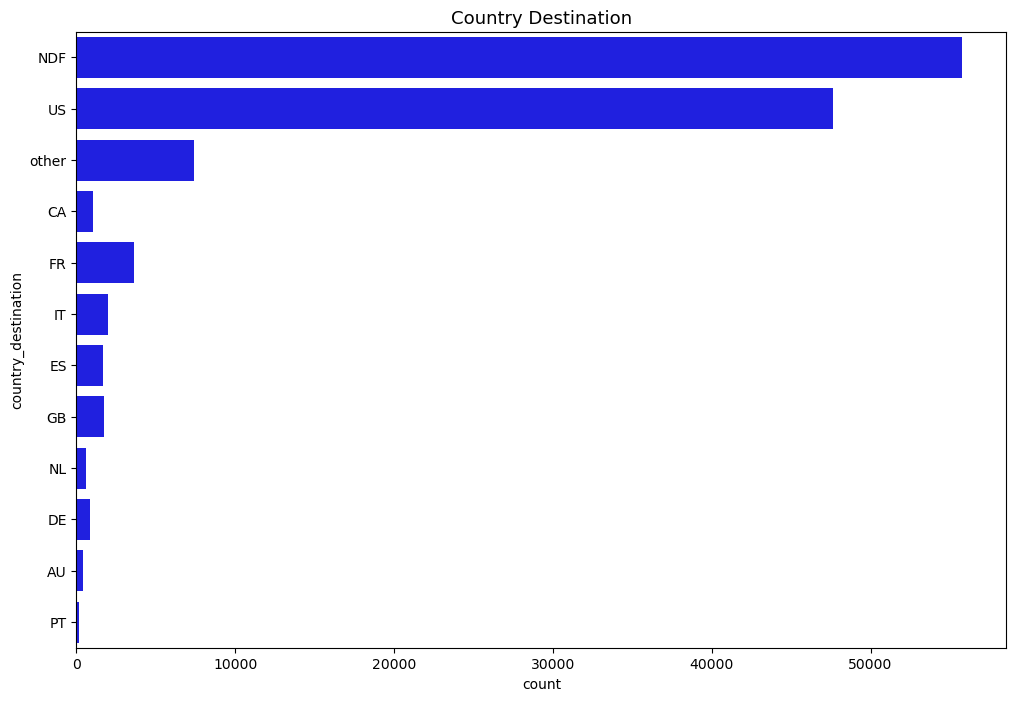

In [59]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='country_destination', data=train_user, color='blue')
plt.title("Country Destination", size=13)

In [60]:
# Remove rows with 'NDF' in the 'country_destination' column
# train_user = train_user[train_user['country_destination'] != 'NDF']

# Save the cleaned dataset to a new CSV file
train_user.to_csv("../data/train_user1.csv", index=False)

Text(0.5, 1.0, 'Country Destination')

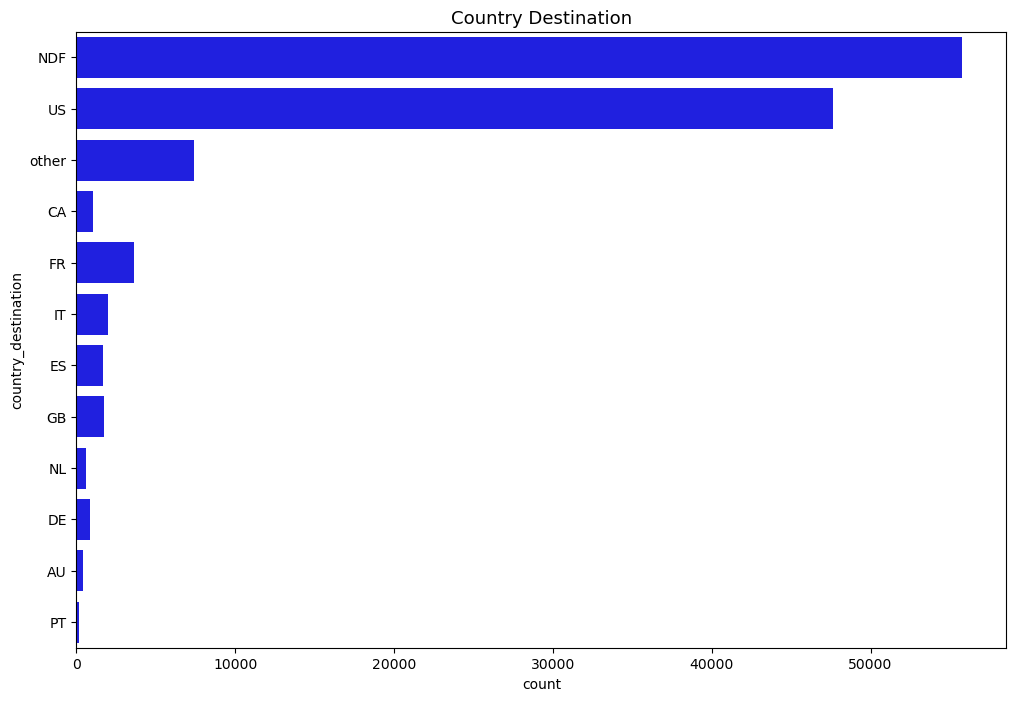

In [61]:
plt.subplots(figsize=(12, 8))
sns.countplot(y='country_destination', data=train_user, color='blue')
plt.title("Country Destination", size=13)

In [62]:
# Stop the Spark session
spark.stop()